# OrionKL test with method 0

In [12]:
%matplotlib inline

import os
import sys
import copy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_vx import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import aplpy
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


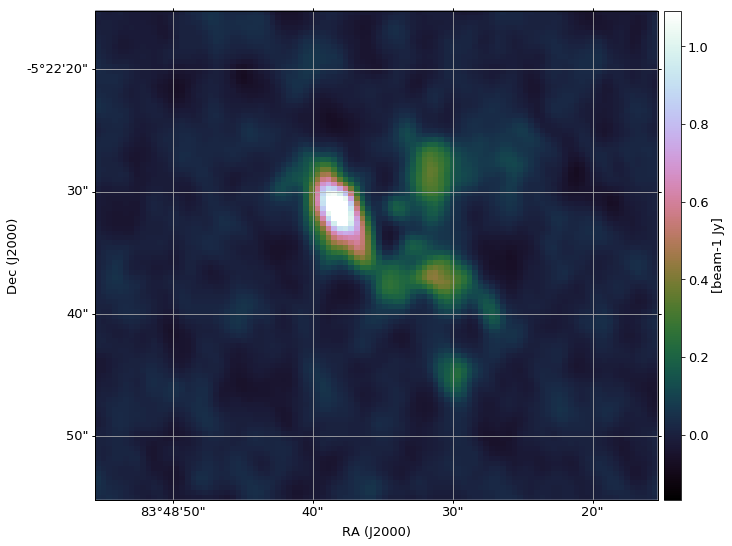

In [13]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu,spec = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In [14]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

[INFO] Number of usable pixels: 749


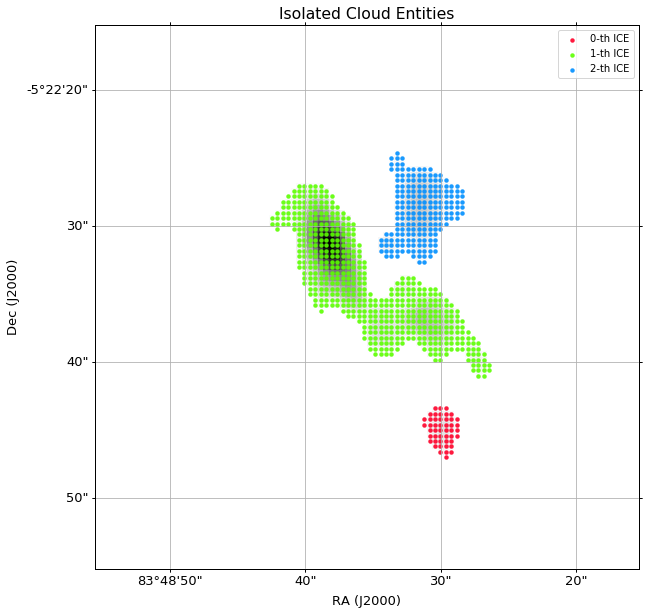

Isolated Cloud Entity 0: 47 pixels of significant emission.
Isolated Cloud Entity 1: 508 pixels of significant emission.
Isolated Cloud Entity 2: 194 pixels of significant emission.
####################################################################################################


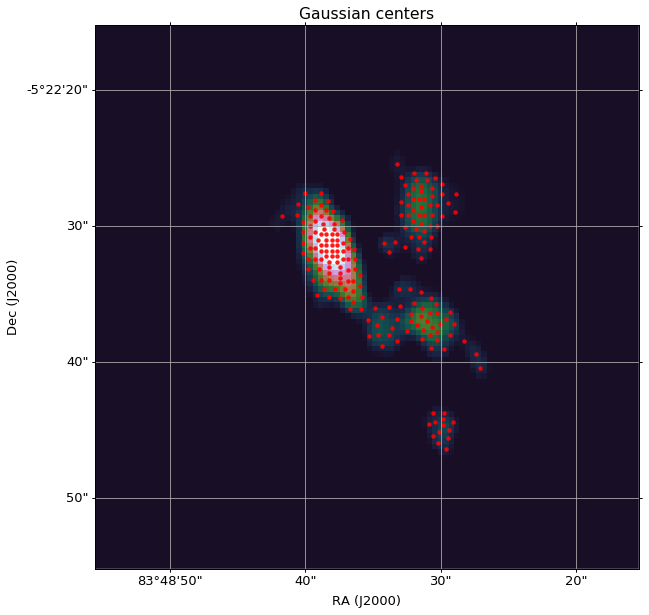

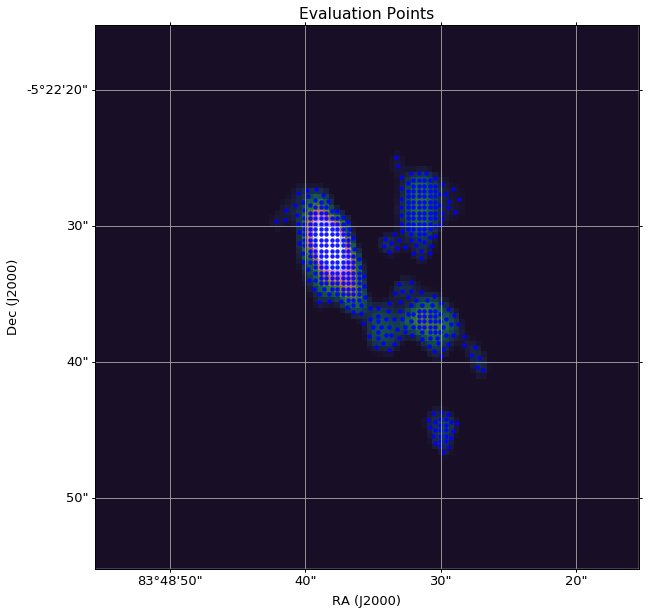

In [22]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, compression=0.267)

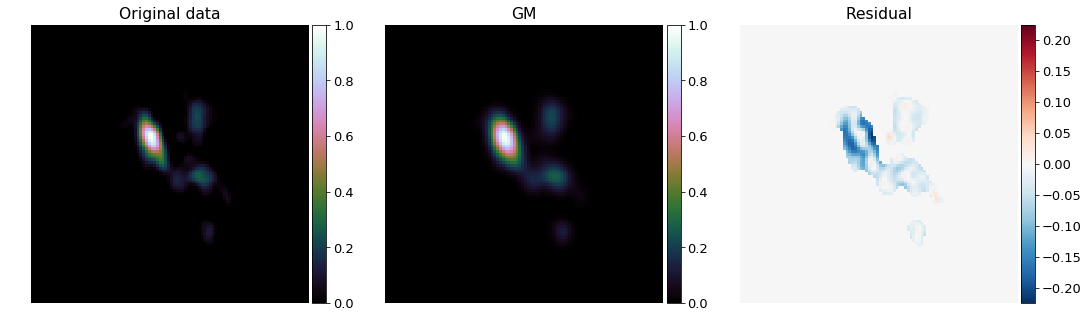

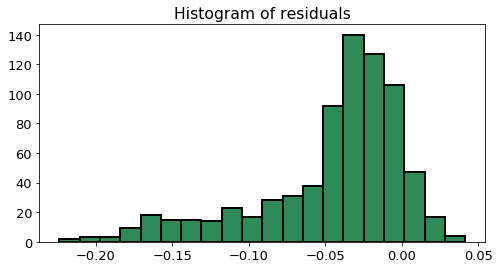

RESIDUAL STATS
RMS of residual: 0.018064964542497567
Inf norm of residual: 0.22393448072711347
Variance of residual: 0.00031488641559875296
Normalized flux addition: 0.30946220814918346
Normalized flux lost: 0.006916717531919992


In [23]:
hdmc.get_residual_stats();

In [24]:
%%prun -s tottime -q -l 30 -T hdmc_m0.prof
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity 0
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.013418565458341292
Inf norm of residual: 0.039774645360892306
Variance of residual: 0.00014273806554627194
Normalized flux addition: 0.15601551942940856
Normalized flux lost: 0.04030987711387845


---------------------------------------------
Building GM for Isolated Cloud Entity 1
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01691687904004148
Inf norm of residual: 0.06407014527968079
Variance of residual: 0.00025405440198394107
Normalized flux addition: 0.04832554916625228
Normalized flux lost: 0.017916671838103682


---------------------------------------------
Building GM for Isolated Cloud Entity 2
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.009595082114912178
Inf norm of residual: 0.03014033824624541
Variance of residual: 7.98399502933371e-05
Norma

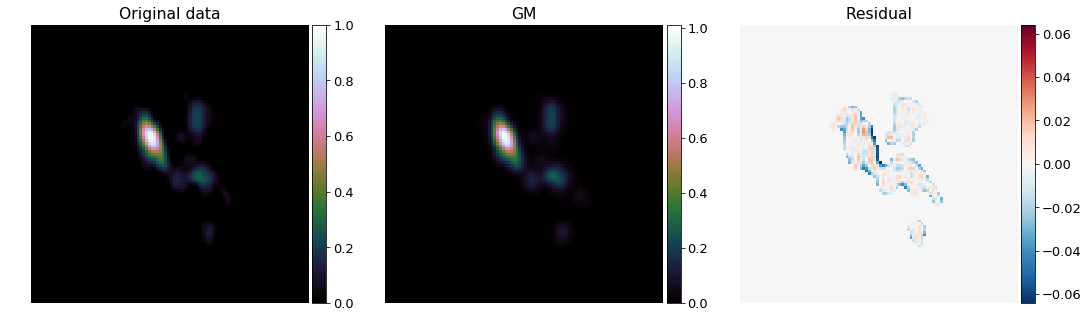

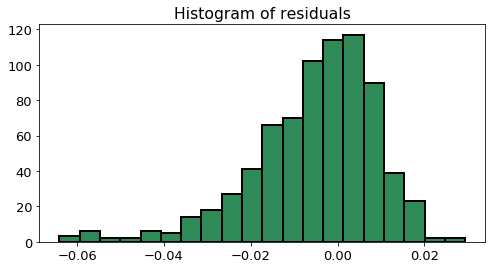

RESIDUAL STATS
RMS of residual: 0.0041716005223860295
Inf norm of residual: 0.0640725624357885
Variance of residual: 1.7250658389872297e-05
Normalized flux addition: 0.05409844752975553
Normalized flux lost: 0.019296538607707234


In [25]:
hdmc.get_residual_stats();

In [26]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 59.033052921295166


In [27]:
w,sig = hdmc.get_params()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:


AttributeError: 'HDMClouds' object has no attribute 'w0'

In [28]:
print(open('hdmc_m0.prof', 'r').read())

         5486276 function calls in 59.033 seconds

   Ordered by: internal time
   List reduced from 120 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    79496   36.189    0.000   36.189    0.000 {fgm_eval.gm_eval2d_2}
   238479    5.498    0.000   11.095    0.000 necompiler.py:751(evaluate)
        3    4.282    1.427   59.015   19.672 {built-in method scipy.optimize._minpack._lmdif}
    79493    3.339    0.000    6.530    0.000 hdmclouds_vx.py:38(d1psi1)
    79499    1.996    0.000    1.996    0.000 utils.py:149(sig_mapping)
    79493    1.867    0.000   54.736    0.001 hdmclouds_vx.py:606(F)
   238479    1.472    0.000    1.866    0.000 necompiler.py:535(getContext)
   238479    1.375    0.000    2.208    0.000 necompiler.py:726(getArguments)
   238479    0.508    0.000    0.508    0.000 {built-in method builtins.sorted}
   476978    0.473    0.000    0.473    0.000 {built-in method numpy.core.multiarray.array}
   476958    0

***